Se requiere realizar una maqueta de un pendulo simple con masa m y longitud de cuerda l para registrar el movimiento angular de este. 
El objetivo del taller es el diseño y calibracion del modelo de un pendulo simple, enfocandose en el registro del movimiento angular del pendulo como funcion del tiempo. Para lograr esto se harán los siguinetes pasos: 
1. Construcción del pendulo simple.
2. Toma de datos exprimentales; angulo y tiempo.
3. Ajuste los parametros del pendulo lineal.
4. Generar las simulaciones con una solucion aproximada a pendulo simple y otra solucion mediante un método numerico. 
5. Comparacion de modelos. 
6. Conclusiones

El pendulo se contruyó en una base en madera de 30 cm aproximadamente, dos varas de madera utilizadas como soporte de 20 cm y una bola de caucho con un peso aproximado de 50 gramos. La cuerda del péndulo es de naylon y tiene una longitud de 15 cm, a continuacion se muestra una imagen del pendulo. 

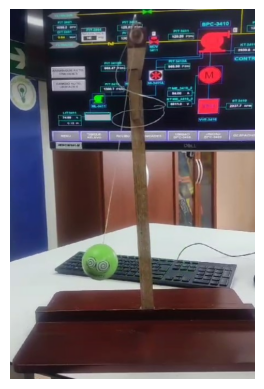

In [61]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

ruta_imagen = 'Imagen_Pendulo.jpg'

imagen = mpimg.imread(ruta_imagen)

plt.imshow(imagen)
plt.axis('off')  # Ocultar ejes
plt.show()

Se procede a tomar los datos usando ......... 

Obteniendo la siguinete tabla. 

In [62]:
import pandas as pd

ruta_excel = 'Datos.xlsx'

datos_excel = pd.read_excel(ruta_excel)

print(datos_excel.head())
print(datos_excel.tail())

   t (s)  x (cm)  y (cm)  Angulo (rad)  Angulo (Degrees)
0  0.000  -9.857   1.230      3.017450        172.887146
1  0.034 -12.360   2.074      2.975342        170.474545
2  0.067 -14.250   2.635      2.958746        169.523642
3  0.100 -15.560   3.093      2.945371        168.757355
4  0.133 -16.200   3.316      2.939690        168.431845
      t (s)  x (cm)  y (cm)  Angulo (rad)  Angulo (Degrees)
347  11.555  12.500   2.984      0.234334         13.426369
348  11.589  11.480   2.703      0.231241         13.249143
349  11.622  10.030   2.211      0.216969         12.431391
350  11.655   8.192   1.678      0.202039         11.575998
351  11.689   6.080   1.153      0.187413         10.737956


La primera columna corresponde al tiempo; el programa nos arroja valores en x y valores en y de la masa y con la funcion arcotangente considerando el signo de x con la formula θ=atan2(y,x)

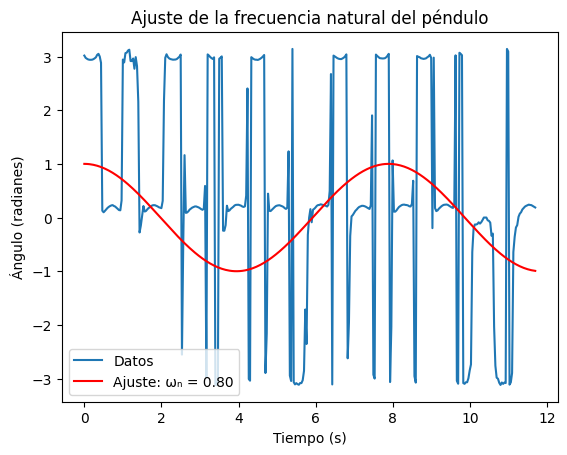

Frecuencia natural del péndulo calculada (ωₙ): 8.085645717360283


In [63]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Longitud de la cuerda en metros
longitud_cuerda = 0.15  # 15 cm convertido a metros

# Aceleración debido a la gravedad en m/s^2
gravedad = 9.80665

# Función para calcular la frecuencia natural del péndulo
def calcular_frecuencia_natural(gravedad, longitud):
    return np.sqrt(gravedad / longitud)

# Función a ajustar
def pendulo_simple(t, omega_n):
    return np.cos(omega_n * t)

# Datos de tiempo y ángulo en radianes desde un DataFrame de Pandas
# Suponiendo que tienes un DataFrame llamado 'datos_excel'
# y las columnas se llaman 't (s)' y 'Angulo (rad)'
# Por ejemplo:
# datos_excel = pd.read_excel('nombre_archivo.xlsx')
t = datos_excel['t (s)'].values
Angulo = datos_excel['Angulo (rad)'].values

# Ajuste de curva
popt, pcov = curve_fit(pendulo_simple, t, Angulo)

# Parámetro ajustado de frecuencia natural del péndulo
omega_n = popt[0]

# Gráfica de los datos y el ajuste
plt.plot(t, Angulo, label='Datos')
plt.plot(t, pendulo_simple(t, omega_n), color='red', label='Ajuste: ωₙ = {:.2f}'.format(omega_n))
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (radianes)')
plt.title('Ajuste de la frecuencia natural del péndulo')
plt.legend()
plt.show()

# Imprimir la frecuencia natural del péndulo calculada
print("Frecuencia natural del péndulo calculada (ωₙ):", calcular_frecuencia_natural(gravedad, longitud_cuerda))


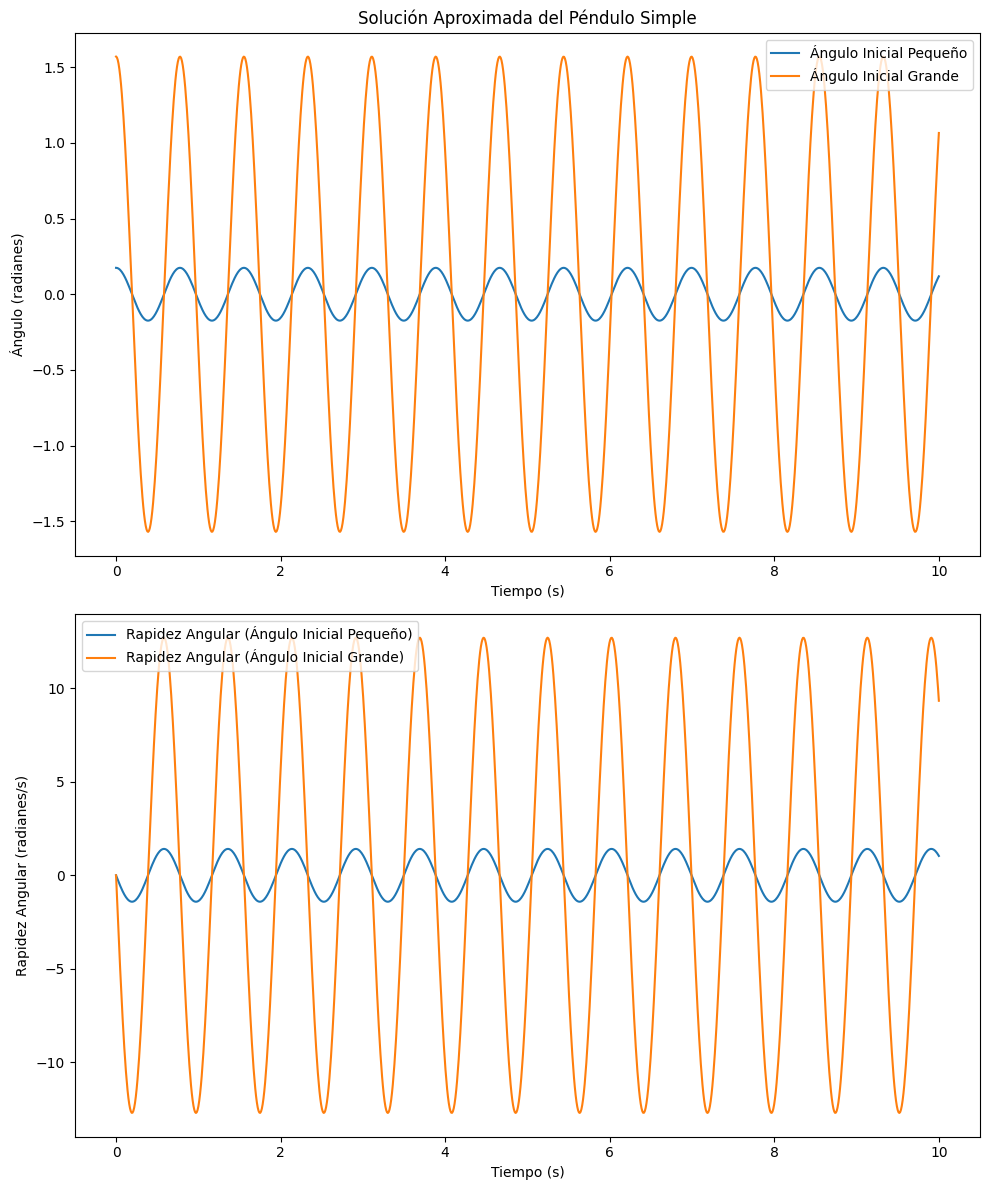

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Define la solución aproximada del péndulo simple
def solucion_aproximada(theta_0, omega_n, t):
    return theta_0 * np.cos(omega_n * t)

# Definir el valor de omega_n obtenido en la segunda parte de la labor
omega_n = calcular_frecuencia_natural(gravedad, longitud_cuerda)

# Definir valores iniciales para los ángulos
theta_0_small = np.pi / 18  # Ángulo inicial pequeño
theta_0_large = np.pi / 2   # Ángulo inicial grande

# Definir valores de tiempo
t = np.linspace(0, 10, 1000)  # Intervalo de tiempo de 0 a 10 segundos

# Evaluar la solución aproximada para ambos casos
theta_aprox_small = solucion_aproximada(theta_0_small, omega_n, t)
theta_aprox_large = solucion_aproximada(theta_0_large, omega_n, t)

# Calcular la rapidez angular (derivada de theta con respecto al tiempo)
theta_dot_small = -theta_0_small * omega_n * np.sin(omega_n * t)
theta_dot_large = -theta_0_large * omega_n * np.sin(omega_n * t)

# Graficar los resultados
plt.figure(figsize=(10, 12))

# Subplot para el ángulo con ángulo inicial pequeño
plt.subplot(2, 1, 1)
plt.plot(t, theta_aprox_small, label='Ángulo Inicial Pequeño')
plt.plot(t, theta_aprox_large, label='Ángulo Inicial Grande')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (radianes)')
plt.title('Solución Aproximada del Péndulo Simple')
plt.legend()

# Subplot para la rapidez angular
plt.subplot(2, 1, 2)
plt.plot(t, theta_dot_small, label='Rapidez Angular (Ángulo Inicial Pequeño)')
plt.plot(t, theta_dot_large, label='Rapidez Angular (Ángulo Inicial Grande)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Rapidez Angular (radianes/s)')
plt.legend()

plt.tight_layout()
plt.show()

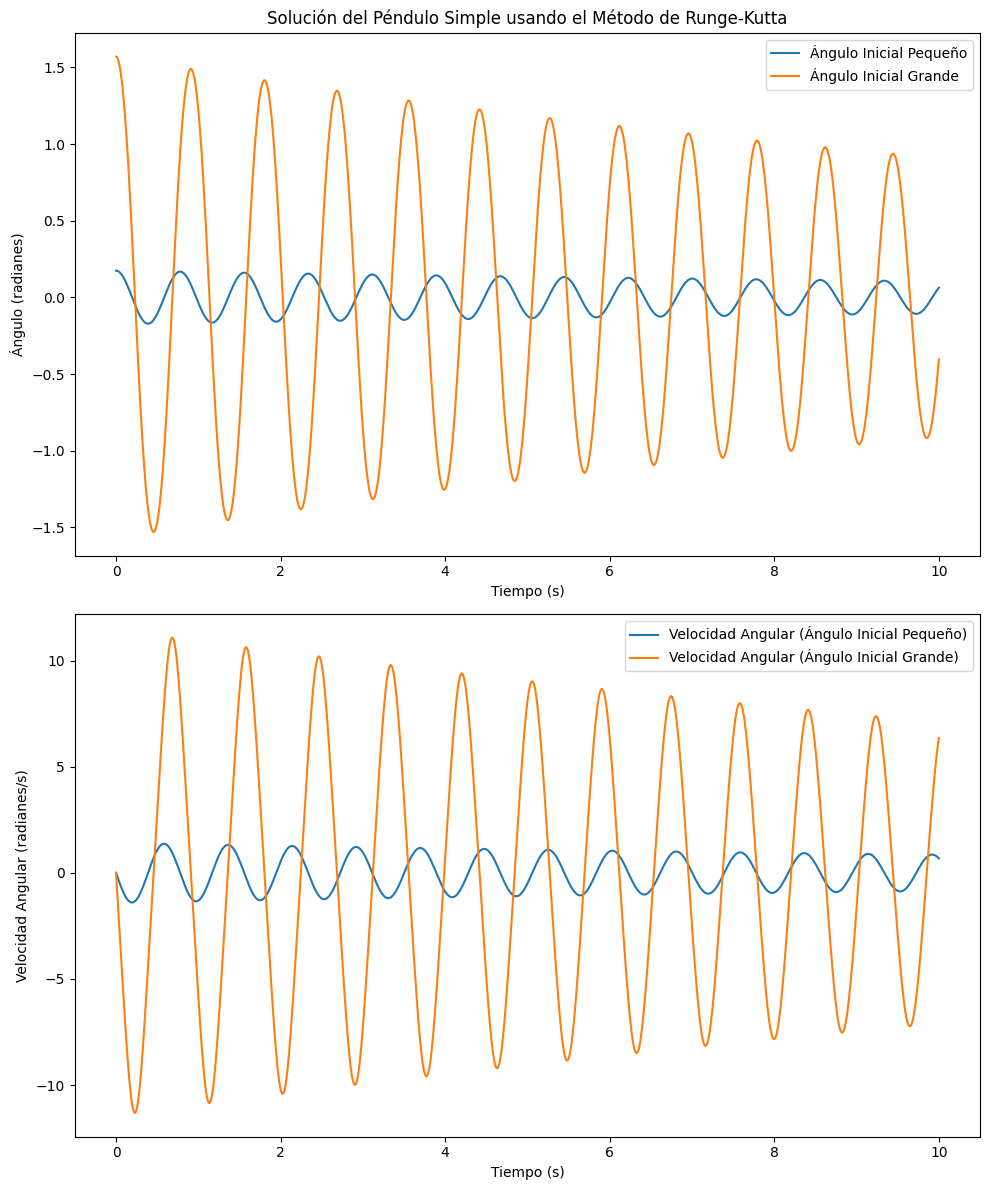

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Define la función para calcular la frecuencia natural del péndulo
def calcular_frecuencia_natural(gravedad, longitud):
    return np.sqrt(gravedad / longitud)

# Definir la ecuación diferencial del péndulo
def aceleracion_angular(theta, omega, omega_n):
    return -omega_n**2 * np.sin(theta) - 0.1 * omega  # Agregar un término de fricción como ejemplo

# Implementación del método de Runge-Kutta de cuarto orden
def runge_kutta(theta, omega, omega_n, dt):
    k1_theta = omega * dt
    k1_omega = aceleracion_angular(theta, omega, omega_n) * dt
    k2_theta = (omega + 0.5 * k1_omega) * dt
    k2_omega = aceleracion_angular(theta + 0.5 * k1_theta, omega + 0.5 * k1_omega, omega_n) * dt
    k3_theta = (omega + 0.5 * k2_omega) * dt
    k3_omega = aceleracion_angular(theta + 0.5 * k2_theta, omega + 0.5 * k2_omega, omega_n) * dt
    k4_theta = (omega + k3_omega) * dt
    k4_omega = aceleracion_angular(theta + k3_theta, omega + k3_omega, omega_n) * dt

    theta_next = theta + (k1_theta + 2 * k2_theta + 2 * k3_theta + k4_theta) / 6
    omega_next = omega + (k1_omega + 2 * k2_omega + 2 * k3_omega + k4_omega) / 6

    return theta_next, omega_next

# Definir valores iniciales para los ángulos
theta_0_small = np.pi / 18  # Ángulo inicial pequeño
theta_0_large = np.pi / 2   # Ángulo inicial grande

# Definir la longitud de la cuerda y la gravedad
longitud_cuerda = 0.15  # Longitud de la cuerda en metros
gravedad = 9.80665  # Aceleración debido a la gravedad en m/s^2

# Definir el valor de omega_n
omega_n = calcular_frecuencia_natural(gravedad, longitud_cuerda)

# Definir valores de tiempo
t = np.linspace(0, 10, 1000)  # Intervalo de tiempo de 0 a 10 segundos
dt = t[1] - t[0]  # Paso de tiempo

# Inicializar arreglos para almacenar los ángulos y las velocidades angulares
theta_small = np.zeros_like(t)
omega_small = np.zeros_like(t)
theta_large = np.zeros_like(t)
omega_large = np.zeros_like(t)

# Resolver la ecuación diferencial del péndulo simple usando el método de Runge-Kutta
theta_small[0], omega_small[0] = theta_0_small, 0
theta_large[0], omega_large[0] = theta_0_large, 0
for i in range(1, len(t)):
    theta_small[i], omega_small[i] = runge_kutta(theta_small[i-1], omega_small[i-1], omega_n, dt)
    theta_large[i], omega_large[i] = runge_kutta(theta_large[i-1], omega_large[i-1], omega_n, dt)

# Graficar los resultados
plt.figure(figsize=(10, 12))

# Subplot para el ángulo con ángulo inicial pequeño
plt.subplot(2, 1, 1)
plt.plot(t, theta_small, label='Ángulo Inicial Pequeño')
plt.plot(t, theta_large, label='Ángulo Inicial Grande')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (radianes)')
plt.title('Solución del Péndulo Simple usando el Método de Runge-Kutta')
plt.legend()

# Subplot para la velocidad angular
plt.subplot(2, 1, 2)
plt.plot(t, omega_small, label='Velocidad Angular (Ángulo Inicial Pequeño)')
plt.plot(t, omega_large, label='Velocidad Angular (Ángulo Inicial Grande)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad Angular (radianes/s)')
plt.legend()

plt.tight_layout()
plt.show()

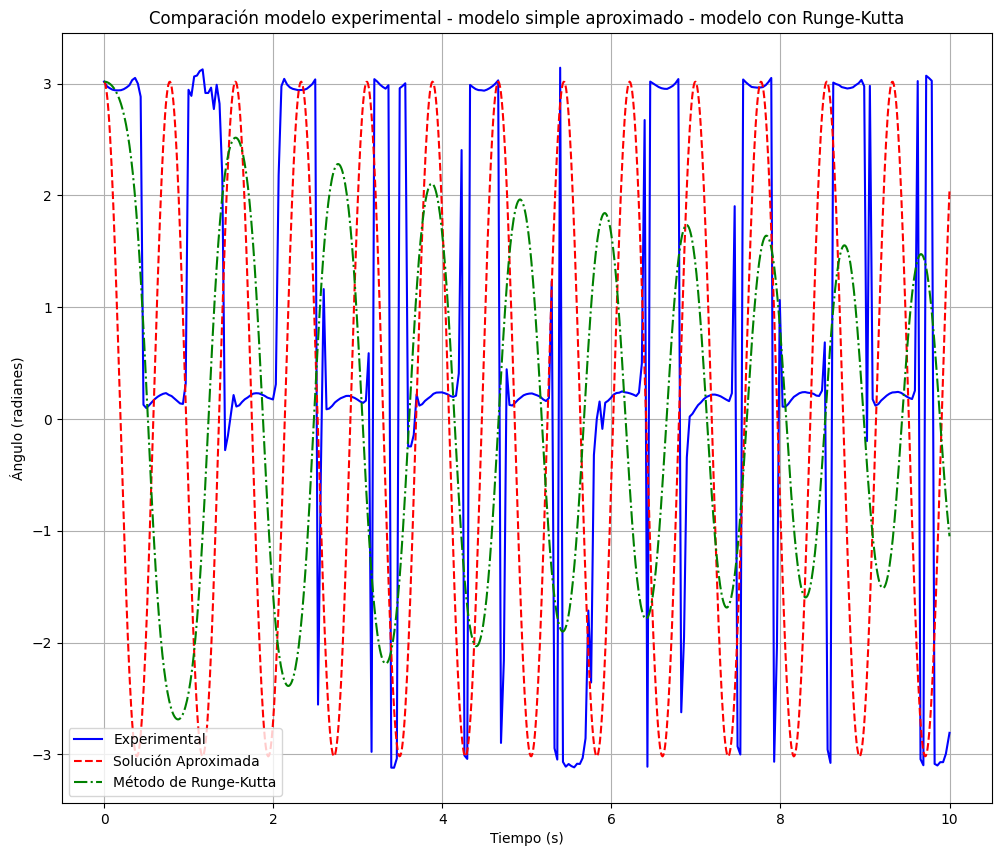

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

# Limitar los datos experimentales hasta el segundo 10
t_exp = datos_excel['t (s)'].values
angulo_exp = datos_excel['Angulo (rad)'].values
indices = t_exp <= 10
t_exp = t_exp[indices]
angulo_exp = angulo_exp[indices]

# Si no hay dato en el segundo 10, agregamos uno interpolando los valores
if t_exp[-1] < 10:
    t_exp = np.append(t_exp, 10)
    f_interp = interp1d(t_exp[:-1], angulo_exp, kind='linear', fill_value='extrapolate')
    angulo_exp = np.append(angulo_exp, f_interp(10))

# Solución aproximada para el ángulo inicial de los datos experimentales (Código 2)
def solucion_aproximada(theta_0, omega_n, t):
    return theta_0 * np.cos(omega_n * t)

omega_n = calcular_frecuencia_natural(gravedad, longitud_cuerda)
theta_0_exp = angulo_exp[0]  # Ángulo inicial en los datos experimentales
t_sim = np.linspace(0, 10, 1000)  # Intervalo de tiempo de 0 a 10 segundos
theta_aprox_exp = solucion_aproximada(theta_0_exp, omega_n, t_sim)

# Método de Runge-Kutta para el ángulo inicial de los datos experimentales (Código 3)
theta_0_exp = angulo_exp[0]  # Ángulo inicial en los datos experimentales
longitud_cuerda = 0.15  # Longitud de la cuerda en metros
gravedad = 9.80665  # Aceleración debido a la gravedad en m/s^2
omega_n = calcular_frecuencia_natural(gravedad, longitud_cuerda)
t = np.linspace(0, 10, 1000)  # Intervalo de tiempo de 0 a 10 segundos
dt = t[1] - t[0]  # Paso de tiempo
theta_exp = np.zeros_like(t)
omega_exp = np.zeros_like(t)
theta_exp[0], omega_exp[0] = theta_0_exp, 0
for i in range(1, len(t)):
    theta_exp[i], omega_exp[i] = runge_kutta(theta_exp[i-1], omega_exp[i-1], omega_n, dt)

# Gráfico comparativo
plt.figure(figsize=(12, 10))
plt.plot(t_exp, angulo_exp, label='Experimental', color='blue')
plt.plot(t_sim, theta_aprox_exp, label='Solución Aproximada', linestyle='--', color='red')
plt.plot(t, theta_exp, label='Método de Runge-Kutta', linestyle='-.', color='green')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (radianes)')
plt.title('Comparación modelo experimental - modelo simple aproximado - modelo con Runge-Kutta')
plt.legend()
plt.grid(True)
plt.show()